# SEEDS: Superpixels Extracted via Energy-Driven Sampling

для корректной работы примера необходимо установить пакет opencv-contrib: pip install --upgrade opencv-python opencv-contrib-python

In [1]:
%matplotlib inline
import cv2
import numpy as np
from cv2 import ximgproc
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('../data/landscape.jpeg')

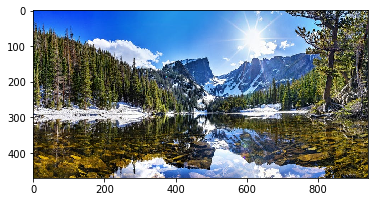

In [3]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [67]:
seeds = None
display_mode = 0
num_superpixels = 100
prior = 2
num_levels = 4
num_iterations = 1000

In [68]:
# преобразуем в пространство цветов
converted_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
height,width,channels = converted_img.shape

In [69]:
# инициализируем алгоритм
seeds = ximgproc.createSuperpixelSEEDS(width, height, channels,
            num_superpixels, num_levels, prior)

# выполняем num_iterations шагов
seeds.iterate(converted_img, 1000)

# получаем разметку пикселей
labels = seeds.getLabels()

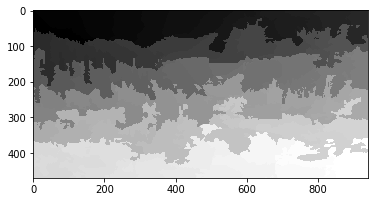

In [70]:
plt.imshow(labels, cmap='gray')

In [71]:
# получаем маску контуров
mask = seeds.getLabelContourMask(thick_line=False)

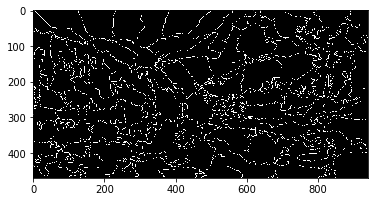

In [72]:
plt.imshow(mask, cmap='gray')

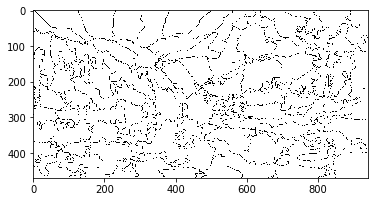

In [73]:
# инвертируем маску
mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask_inv, cmap='gray')

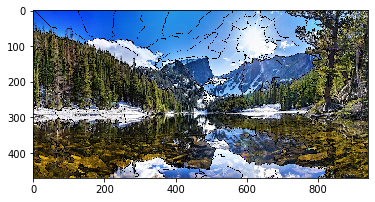

In [74]:
# зануляем пикселы исходной картинки на границах
result_bg = cv2.bitwise_and(img, img, mask=mask_inv)
plt.imshow(result_bg[..., ::-1], cmap='gray')

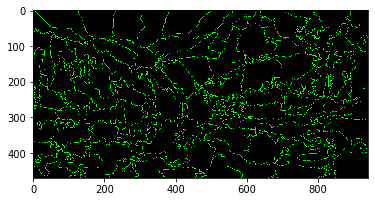

In [75]:
# создаем изображение контуров
color_img = np.zeros((height,width,3), np.uint8)
color_img[:] = (0, 255, 0)
result_fg = cv2.bitwise_and(color_img, color_img, mask=mask)
plt.imshow(result_fg[..., ::-1], cmap='gray')

In [76]:
# совмещаем границы с исходным изображением
result = cv2.add(result_bg, result_fg)

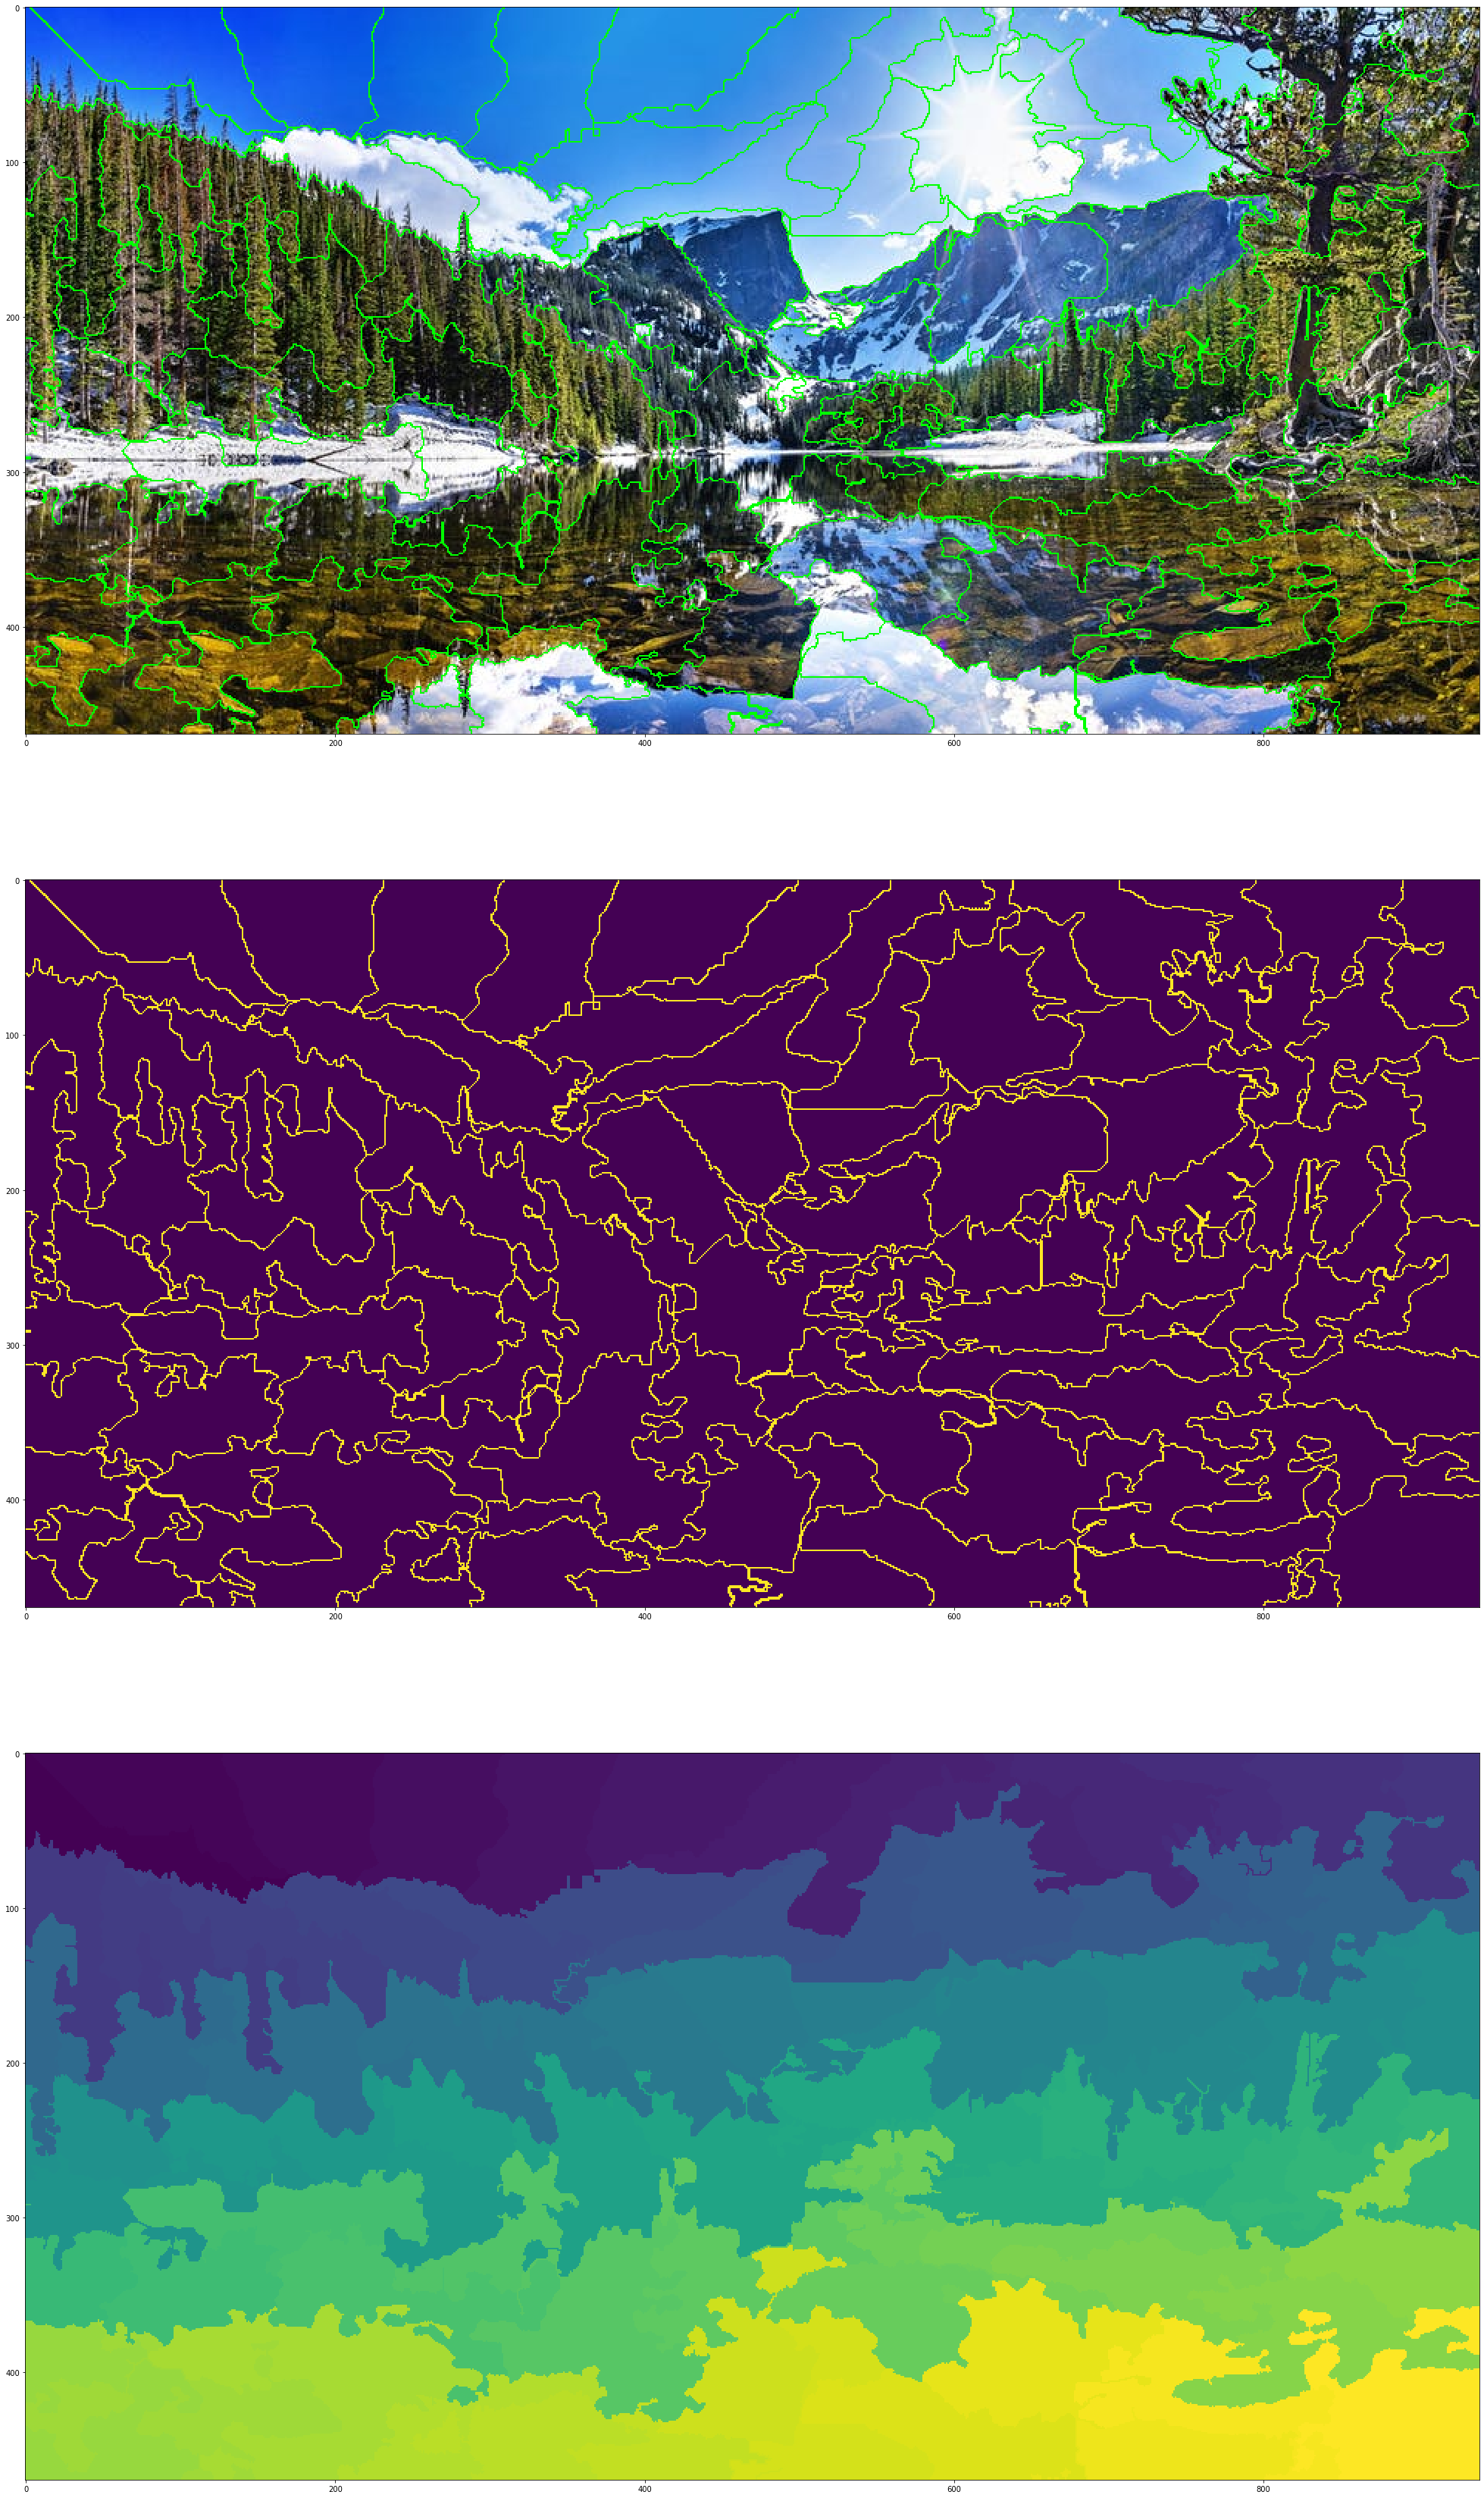

In [77]:
imgs = [cv2.cvtColor(result, cv2.COLOR_BGR2RGB),
        mask, labels]
fig = plt.figure(figsize=(60, 60))
for i, e in enumerate(imgs, 1):
    subplot = fig.add_subplot(3, 1, i)
    plt.imshow(e);